# HW assignment on COVID-19 image classification:

* You are encouraged to run the colab code on google GPU runtime.  
* Given the selected code, pre-trained model, and the prediction results on a testing dataset, you will pratice the summarization of model performance by answering below questions

  * What is the defined image size as model input?
  * How many trainable parameters in the keras model as provided? discuss your findings
  * How does the muti-class prediction accuracy look like?  (hint: see classification_report and confusion matrix? discuss your findings
  * Dose the pre-trained model pay attention to the right area in the image to predict the class of image? discuss your findings, discuss your findings

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import load_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from random import shuffle
import random
import os

# Design DL Model

1. **Input Layer**: This represents our input image data. It will reshape the image into a single dimensional array. For example, if your image is 64x64, it will convert to (4096,1) array (64x64 = 4096).


2. **Conv Layer**: This layer will extract features from image.


3. **Pooling Layer**: This layer will reduce the spatial volume of input image after convolution.


4. **Fully Connected Layer**: This will connect the network from a layer to another layer


5. **Output Layer**: This is the predicted values layer.

In [1]:
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256

IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(64, (7, 7), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax', name='predictions'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

2024-03-10 20:08:42.005076: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 20:08:42.005218: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 20:08:42.475602: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 20:08:43.407104: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 20:08:53.710567: W tensorflow/compiler/tf2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 64)      9472      
                                                                 
 batch_normalization (Batch  (None, 250, 250, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 125, 125, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 125, 125, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 121, 121, 128)     204928    
                                                                 
 batch_normalization_1 (Bat  (None, 121, 121, 128)     5

In [11]:
#model.save_weights("COVID-Model-{}-{}-{}-{}.h5".format(IMAGE_WIDTH, 3, batch_size, epochs))

In [54]:
model.load_weights("COVID-Model-256-3-48-25.h5")

In [64]:
test_df = pickle.load(open("test_df.pkl", "rb"))

In [71]:
test_df.shape

(448, 3)

# Calculate Model Accuracy

In [72]:
test_df.head()

,filename,category,observed
0,test/COVID-1241.png,Lung_Opacity,COVID
1,test/COVID-193.png,COVID,COVID
2,test/Lung_Opacity-5938.png,Lung_Opacity,Lung_Opacity
3,test/Normal-4253.png,Normal,Normal
4,test/Lung_Opacity-3177.png,Lung_Opacity,Lung_Opacity


In [73]:
print(classification_report(test_df.category, test_df.observed))

                 precision    recall  f1-score   support

          COVID       0.70      0.95      0.80        74
   Lung_Opacity       0.77      0.87      0.82       131
         Normal       0.96      0.63      0.76       152
Viral_Pneumonia       0.90      0.99      0.94        91

       accuracy                           0.83       448
      macro avg       0.83      0.86      0.83       448
   weighted avg       0.85      0.83      0.82       448



In [74]:
confusion_matrix(test_df.category, test_df.observed)

array([[ 70,   3,   1,   0],
       [ 15, 114,   2,   0],
       [ 15,  31,  96,  10],
       [  0,   0,   1,  90]])

# visulization of model attention on image classiifcaiton

In [75]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

In [76]:
image_titles = ['Normal', 'Lung_Opacity', 'COVID', 'Viral_Pneumonia',]

In [79]:
# you can choose different image from the each class 
img1 = load_img('./COVID-19_Radiography_Dataset/Normal/images/Normal-500.png', target_size=(256, 256))
img2 = load_img('./COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-500.png', target_size=(256, 256))
img3 = load_img('./COVID-19_Radiography_Dataset/COVID/images/COVID-500.png', target_size=(256, 256))
img4 = load_img('./COVID-19_Radiography_Dataset/Viral_Pneumonia/images/Viral Pneumonia-500.png', target_size=(256, 256))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3), np.array(img4)])

In [80]:
X = preprocess_input(images)

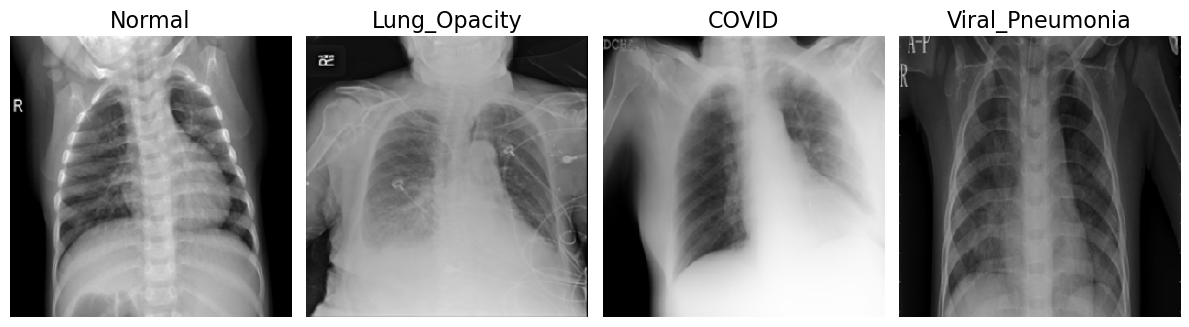

In [81]:
# Rendering
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [82]:
from matplotlib import cm

try:
    from tf_keras_vis.gradcam import Gradcam
except:
    !pip install tf-keras-vis
    from tf_keras_vis.gradcam import Gradcam

In [83]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils.scores import CategoricalScore

replace2linear = ReplaceToLinear()

# Create ScoreCAM object
scorecam = Scorecam(model, model_modifier=replace2linear)

In [84]:
score = CategoricalScore([0, 1, 2, 3])

In [85]:
# Generate heatmap with Faster-ScoreCAM
cam = scorecam(score,
               X,
               penultimate_layer=-1,
               max_N=10)

2/2 [==============================] - 1s 406ms/step


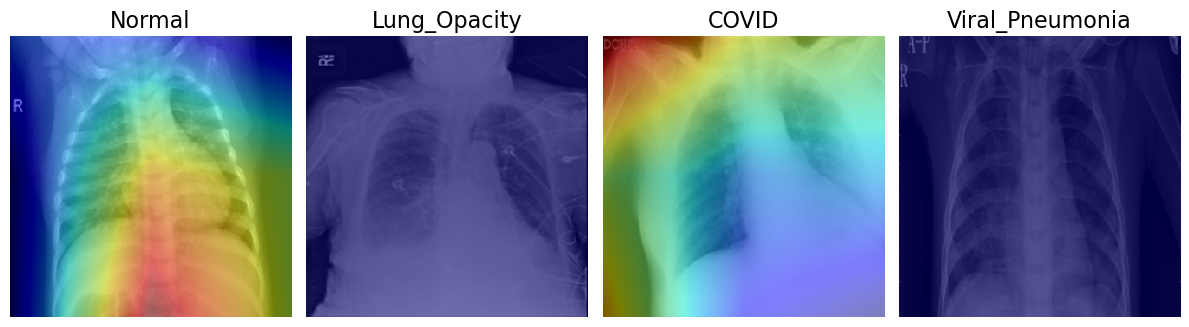

In [86]:
# Render
f, ax = plt.subplots(nrows=1, ncols=4,figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()